In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [63]:
digits = datasets.load_digits()

In [64]:
x = digits.data
y = digits.target

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [66]:
x_train.shape

(1347, 64)

# sklearn PCA

In [67]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

Wall time: 5.98 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
knn_clf.score(x_test,y_test)

0.9888888888888889

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [70]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction,y_train)

Wall time: 2.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
knn_clf.score(x_test_reduction, y_test)

0.9844444444444445

In [72]:
pca.explained_variance_ratio_

array([0.15009193, 0.13069277, 0.12019572, 0.08370082, 0.0556758 ,
       0.05005698, 0.04538061, 0.03595631, 0.03373221, 0.03121025,
       0.02380048, 0.02270934, 0.01889835, 0.01774169, 0.01514735,
       0.01441141, 0.01305592, 0.01261825, 0.01027409, 0.00912159,
       0.00877585, 0.0079617 , 0.00753236, 0.00725413, 0.00708644,
       0.00594304, 0.00570976, 0.00505883, 0.00493244, 0.00422868])

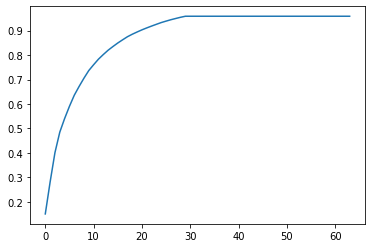

In [73]:
plt.plot([i for i in range(x_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [74]:
pca = PCA(0.95)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
pca.n_components_

29

In [81]:
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
knn_clf.score(x_test_reduction, y_test)

0.9844444444444445

In [84]:
pca = PCA(n_components=2)
pca.fit(x)
x_reduction = pca.transform(x)

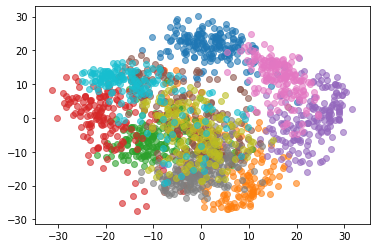

In [88]:
for i in range(10):
    plt.scatter(x_reduction[y==i,0],x_reduction[y==i,1],alpha=0.6)
plt.show()